<a href="https://colab.research.google.com/github/mahera02/machine_learning/blob/master/ML_Problem_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import cv2
import numpy as np
import scipy
from scipy import ndimage
from skimage import util 

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

Using TensorFlow backend.


**Rounding the grey values of the images to 1 and 0 to obtain black and white images**

In [0]:
# First I tried below method for converting gray scale images to binary but as it is very slow, I am replacing it below by using cv2 library which is fast

def binarize_array(numpy_array, threshold=127):
    """Binarize a numpy array."""
    for i in range(len(numpy_array)):
        for j in range(len(numpy_array[0])):
            if numpy_array[i][j] > threshold:
                numpy_array[i][j] = 255
            else:
                numpy_array[i][j] = 0
    return numpy_array

# for i in range(len(train_images_original)):
#     train_images_original[i] = binarize_array(train_images_original[i])

# for i in range(len(test_images_original)):
#     test_images_original[i] = binarize_array(test_images_original[i])
  
#plt.grid(None)
#plt.imshow(binarize_array(train_images_original[0]))
#binarize_array(train_images_original[0]).shape


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 255
  255   0 255 255 255   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 255 255 255 255 255 255 255
  255 255 255 255 255   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 255 255 255 255 255 255 255 25

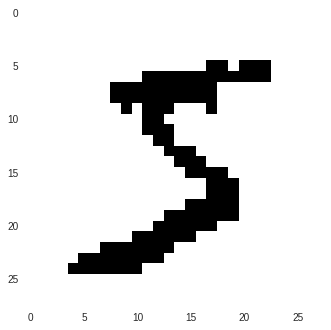

In [3]:
# Conversion Using cv2

threshold = 127
for i in range(len(train_images_original)):
    train_images_original[i] = cv2.threshold(train_images_original[i], threshold, 255, cv2.THRESH_BINARY)[1]
    
for i in range(len(test_images_original)):
    test_images_original[i] = cv2.threshold(test_images_original[i], threshold, 255, cv2.THRESH_BINARY)[1]

print(train_images_original[0])

# checking the binary image for any index
plt.grid(None)
plt.imshow(train_images_original[0])

In [0]:

train_images_original = train_images_original / 255;
test_images_original  = test_images_original  / 255; 

#print(train_images_original[0])

In [5]:
# initializing connected components

conn_train = np.zeros_like(train_labels_original)
conn_test  = np.zeros_like(test_labels_original)
print(train_labels_original,)
print(conn_train,)

[5 0 4 ... 5 6 8]
[0 0 0 ... 0 0 0]


**Using Scipy.ndimage for calculating the connected components (i.e. No of white Regions)** https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.label.html

Note: DFS algorithm is not 100% accurate and is very slow


In [6]:
for i in range(len(conn_train)):
  label,num_white_regions = ndimage.label(util.invert(train_images_original[i]))
  conn_train[i] = num_white_regions
  
print(util.invert(train_images_original[59999]))
print(conn_train[59999])

for i in range(len(conn_test)):
  label,num_white_regions = ndimage.label(util.invert(test_images_original[i]))
  conn_test[i] = num_white_regions

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1.
  1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
  0. 0. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
  0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
  1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1

In [0]:
#class Graph: 
#  def __init__(self, row, col, g): 
#    self.ROW = row 
#    self.COL = col 
#    self.graph = g
#  def isSafe(self, i, j, visited):
#    return (i >= 0 and i < self.ROW and j >= 0 and j < self.COL and not visited[i][j] and self.graph[i][j])            
#  def DFS(self, i, j, visited):
#    rowNbr = [-1, -1, -1,  0, 0,  1, 1, 1]; 
#    colNbr = [-1,  0,  1, -1, 1, -1, 0, 1]; 
#    visited[i][j] = True
#    for k in range(8):
#      if self.isSafe(i + rowNbr[k], j + colNbr[k], visited):
#        self.DFS(i + rowNbr[k], j + colNbr[k], visited) 
#  def countIslands(self):
#    visited = [[False for j in range(self.COL)]for i in range(self.ROW)] 
#    count = 0
#    for i in range(self.ROW):
#      for j in range(self.COL):
#        if visited[i][j] == False and self.graph[i][j] ==1:
#          self.DFS(i, j, visited)
#          count += 1
#    return count
  
#connected_comp_list = []
#for a in train_images_original:
#  row = len(a)
#  col = len(a[0])
#  g = Graph(row, col, a)
#  connected_comp_list.append(g.countIslands())
#print(connected_comp_list)

#for i in range(len(connected_comp_list)):
#  connected_components_train[i] = connected_comp_list[i]

In [8]:
(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

print(train_images.shape)
print(test_images.shape)

from keras.utils import to_categorical

train_labels = to_categorical(train_labels_original,10)
test_labels = to_categorical(test_labels_original,10)

print(train_labels.shape)
print(test_labels.shape)

print(conn_train)
conn_train = conn_train / 4
conn_test = conn_test / 4

print(conn_train)


(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)
[1 2 1 ... 1 1 3]
[0.25 0.5  0.25 ... 0.25 0.25 0.75]


**Training the network using keras by adding the new feature(num of white regions)  and then finding training and test accuracy**

In [9]:
from keras import models
from keras.models import Model
from keras.layers import Input, Dense


# training data
input_shape =Input((28*28,))

# new feature
conn_feature =Input((1,))

input_vector = Dense(64, activation='sigmoid')(input_shape)

# appending new features and output of first layer
network  = keras.layers.add([input_vector, conn_feature])   
network  = Dense(10, activation='softmax')(network)

# network model
network  = Model(inputs=[input_shape, conn_feature], outputs=network)

sgd = keras.optimizers.SGD(lr=0.1)
network.compile(optimizer=sgd,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
epochs = 30
History = network.fit([train_images, 
                      conn_train],
                      train_labels,
                      epochs=epochs, 
                      batch_size=128,validation_data=([test_images,conn_test], test_labels))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 2s 41us/step - loss: 1.0138 - acc: 0.7723 - val_loss: 0.5117 - val_acc: 0.8815
Epoch 2/30
60000/60000 [==============================] - 2s 36us/step - loss: 0.4360 - acc: 0.8952 - val_loss: 0.3610 - val_acc: 0.9069
Epoch 3/30
60000/60000 [==============================] - 2s 38us/step - loss: 0.3471 - acc: 0.9099 - val_loss: 0.3109 - val_acc: 0.9173
Epoch 4/30
60000/60000 [==============================] - 2s 37us/step - loss: 0.3073 - acc: 0.9172 - val_loss: 0.2820 - val_acc: 0.9254
Epoch 5/30
60000/60000 [==============================] - 2s 36us/step - loss: 0.2828 - acc: 0.9227 - val_loss: 0.2638 - val_acc: 0.9297
Epoch 6/30
60000/60000 [==============================] - 2s 37us/step - loss: 0.2654 - acc: 0.9269 - val_loss: 0.2497 - val_acc: 0.9331
Epoch 7/

Test loss: 0.14108139499723912
Test accuracy: 95.93 %


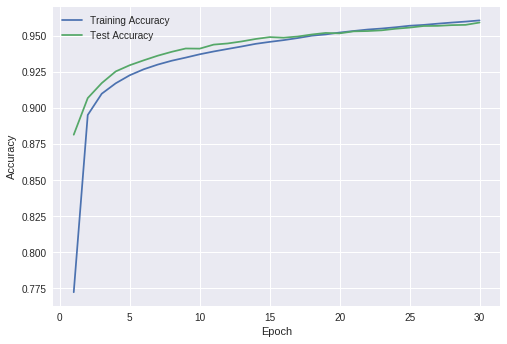

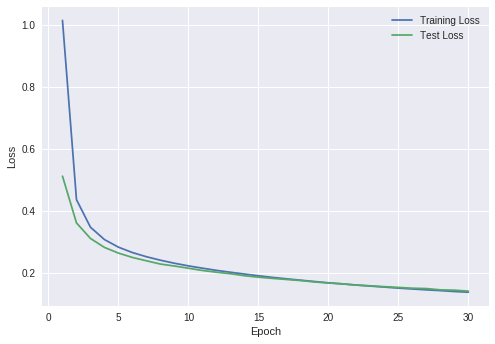

In [10]:
#evaluate function: Returns the loss value & metrics values for the model in test mode
metrics = network.evaluate([test_images,conn_test], test_labels, verbose=0)
print('Test loss:', metrics[0])
print('Test accuracy:', metrics[1]*100,'%')

accuracyplot = plt.plot(range(1,31),History.history['acc'],range(1,31),History.history['val_acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(('Training Accuracy','Test Accuracy'))
plt.show(accuracyplot)

lossplot = plt.plot(range(1,31),History.history['loss'],range(1,31),History.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(('Training Loss','Test Loss'))
plt.show(lossplot)